# Nutrition Agent Demo 🥗🤖

This notebook demonstrates the Nutrition Agent capabilities with interactive examples and evaluation results.

## Setup and Imports

In [1]:
import sys

sys.path.append("..")

import json
from pathlib import Path

from dotenv import load_dotenv

load_dotenv()

from agents.base_agent import AgentConfig, ModelProvider
from agents.nutrition_planner import (
    DietaryConstraints,
    Inventory,
    NutritionPlannerAgent,
)
from evaluators.nutrition_evaluator import NutritionEvaluator

## Example 1: Basic Meal Planning

Let's create a simple meal plan with basic ingredients.

In [2]:
# Define available ingredients
inventory = Inventory(
    items=[
        {"name": "chicken_breast", "amount_g": 400, "unit": "g"},
        {"name": "eggs", "amount_g": 360, "unit": "g"},
        {"name": "milk", "amount_g": 500, "unit": "ml"},
        {"name": "white_rice", "amount_g": 300, "unit": "g"},
        {"name": "lettuce", "amount_g": 200, "unit": "g"},
    ]
)

# Define dietary constraints
constraints = DietaryConstraints(
    daily_calories=2000.0,
    pfc_ratio=(30.0, 25.0, 45.0),  # 30% protein, 25% fat, 45% carbs
    allergens=[],
    dietary_restrictions=[],
)

print("Inventory:")
for item in inventory.items:
    print(f"  • {item['name']}: {item['amount_g']}{item['unit']}")

print("\nTargets:")
print(f"  • Daily calories: {constraints.daily_calories} kcal")
print(
    f"  • PFC ratio: {constraints.pfc_ratio[0]}% / {constraints.pfc_ratio[1]}% / {constraints.pfc_ratio[2]}%"
)

Inventory:
  • chicken_breast: 400g
  • eggs: 360g
  • milk: 500ml
  • white_rice: 300g
  • lettuce: 200g

Targets:
  • Daily calories: 2000.0 kcal
  • PFC ratio: 30.0% / 25.0% / 45.0%


In [3]:
# Create agent with GPT-4.1
config = AgentConfig(
    model_provider=ModelProvider.OPENAI, model_name="gpt-4.1-mini", temperature=0.7
)

agent = NutritionPlannerAgent(config)

# Generate meal plan
print("🤖 Generating 3-day meal plan...")
meal_plans = await agent.generate_meal_plan(inventory, constraints, days=3)

# Display results
agent.display_meal_plans(meal_plans)

🤖 Generating 3-day meal plan...


E2E Mode: Gathering nutrition info and creating meal plan...

First response received: ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_U208m2EvTesDay0tMJki5OQU', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Myqz52FixoOyN56sgiNQi1Ek', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_N09SletQ0b9z23KVHqt2j3h3', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_oxcx2kOo6s4g9YgMPOF5iUme', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_tWrX7maVsLdyDzpNhh8Kb3Mo', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')])

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_U208m2EvTesDay0tMJki5OQU', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Myqz52FixoOyN56sgiNQi1Ek', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_N09SletQ0b9z23KVHqt2j3h3', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_oxcx2kOo6s4g9YgMPOF5iUme', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_tWrX7maVsLdyDzpNhh8Kb3Mo', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_U208m2EvTesDay0tMJki5OQU', 'content': "{'foods': [{'name': 'Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 195.0, 'protein_g': 29.55, 'fat_g': 7.72, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 63.0, 'fat_pct': 37.0, 'carbs_pct': 0.0}}}, {'name': 'Skinless Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 110.0, 'protein_g': 23.09, 'fat_g': 1.24, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 89.2, 'fat_pct': 10.8, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breasts', 'brand': 
'Tyson Foods', 'nutrition_per_100g': {'calories': 98.21428571428572, 'protein_g': 20.53571428571429, 'fat_g': 
2.232142857142857, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 80.3, 'fat_pct': 19.7, 'carbs_pct': 0.0}}}, 
{'name': 'Chicken Breast', 'brand': 'Kirkland Signature', 'nutrition_per_100g': {'calories': 98.21428571428572, 
'protein_g': 17.857142857142858, 'fat_g': 1.3392857142857144, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 85.6, 
'fat_pct': 14.4, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breast', 'brand': 'Publix', 
'nutrition_per_100g': {'calories': 116.07142857142858, 'protein_g': 22.321428571428573, 'fat_g': 2.678571428571429,
'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 78.7, 'fat_pct': 21.3, 'carbs_pct': 0.0}}}]}"}, {'role': 'tool', 
'tool_call_id': 'call_Myqz52FixoOyN56sgiNQi1Ek', 'content': "{'foods': [{'name': 'Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 147.0, 'protein_g': 12.58, 'fat_g': 9.94, 'carbs_g': 0.77, 'pfc_ratio': 
{'protein_pct': 35.2, 'fat_pct': 62.6, 'carbs_pct': 2.2}}}, {'name': 'Scrambled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 212.0, 'protein_g': 13.84, 'fat_g': 16.18, 'carbs_g': 2.08, 'pfc_ratio': 
{'protein_pct': 26.5, 'fat_pct': 69.6, 'carbs_pct': 4.0}}}, {'name': 'Fried Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 201.0, 'protein_g': 13.63, 'fat_g': 15.31, 'carbs_g': 0.88, 'pfc_ratio': 
{'protein_pct': 27.8, 'fat_pct': 70.4, 'carbs_pct': 1.8}}}, {'name': 'Eggs', 'brand': 'Naturegg', 
'nutrition_per_100g': {'calories': 140.0, 'protein_g': 12.0, 'fat_g': 10.0, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 34.8, 'fat_pct': 65.2, 'carbs_pct': 0.0}}}, {'name': 'Boiled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 154.0, 'protein_g': 12.53, 'fat_g': 10.57, 'carbs_g': 1.12, 'pfc_ratio': 
{'protein_pct': 33.5, 'fat_pct': 63.5, 'carbs_pct': 3.0}}}]}"}, {'role': 'tool', 'tool_call_id': 
'call_N09SletQ0b9z23KVHqt2j3h3', 'content': "{'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g':
{'calories': 60.0, 'protein_g': 3.22, 'fat_g': 3.25, 'carbs_g': 4.52, 'pfc_ratio': {'protein_pct': 21.4, 'fat_pct':
48.6, 'carbs_pct': 30.0}}}, {'name': '2% Fat Milk', 'brand': None, 'nutrition_per_100g': {'calories': 50.0, 
'protein_g': 3.3, 'fat_g': 1.97, 'carbs_g': 4.68, 'pfc_ratio': {'protein_pct': 26.6, 'fat_pct': 35.7, 'carbs_pct': 
37.7}}}, {'name': 

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_hkK7LlON7XIAJA9GUwymtGqa', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white rice","lettuce"]}', 
name='search_recipes_by_ingredients'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_hkK7LlON7XIAJA9GUwymtGqa', 'content': "{'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, 
low-calorie dish for lunch or dinner.', 'ingredients': ['1 cup iceberg lettuce', '1 tsp minced garlic', '1 oz 
lightly salted dry roasted peanuts', '1 tbsp less sodium soy sauce', '100 g cilantro', '100 g young green onions', 
'1 can sliced water chestnuts', '4 oz ground chicken'], 'nutrition': {'calories': 58.0, 'protein_g': 4.53, 'fat_g':
2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 31.0, 'fat_pct': 38.0, 'carbs_pct': 31.0}}}, {'name': 'Chicken 
Lettuce Wraps', 'description': 'Great alternative for rotisserie chicken that you see in the supermarket.', 
'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz rotisserie chicken breast', '1/2 cup sliced cucumber', '3
leaves outer lettuce', '2 slices light swiss cheese'], 'nutrition': {'calories': 219.0, 'protein_g': 37.27, 
'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 70.0, 'fat_pct': 18.7, 'carbs_pct': 11.2}}}, {'name': 
'White Fried Rice', 'description': 'Fried rice with egg, shrimp, corn and beans.', 'ingredients': ['3 medium eggs',
'1/3 cup green beans', '1/2 cup corn', '8 small shrimp', '3 tbsps soy sauce', '1 1/2 cups white rice'], 
'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 'carbs_g': 22.83, 'pfc_ratio': {'protein_pct': 
24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie Chicken Breast', 'description': 'As simple as a 
chicken on a rotisserie, with olive oil and spices.', 'ingredients': ['1 tbsp oilve oil', '1 breast, bone removed 
rotisserrie chicken'], 'nutrition': {'calories': 505.0, 'protein_g': 58.41, 'fat_g': 28.75, 'carbs_g': 0.0, 
'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 'carbs_pct': 0.0}}}, {'name': 'White Chili Chicken', 
'description': 'Great alternative to regular chili with a kick.', 'ingredients': ['1/4 cup shredded cheese', '1 cup
Italian tomatoes', '12 oz canned chicken breast', '2 cups fat free low sodium chicken broth', '3 tsps chili 
powder', '1 cup seasoned recipe pinto beans', '2 tsps ground oregano', '1 tsp olive oil', '2 cloves garlic', '1/2 
medium white onion', '1/4 medium green pepper', '1/2 medium red pepper'], 'nutrition': {'calories': 343.0, 
'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': {'protein_pct': 43.4, 'fat_pct': 21.5, 
'carbs_pct': 35.0}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_V00dk2f9IFyX6ySOM68y9k6K', 
function=Function(arguments='{"meals":[{"name":"Chicken Lettuce 
Cups","calories":58,"protein_g":4.53,"fat_g":2.47,"carbs_g":4.54},{"name":"Chicken Lettuce 
Wraps","calories":219,"protein_g":37.27,"fat_g":4.43,"carbs_g":5.98},{"name":"White Fried 
Rice","calories":166,"protein_g":10,"fat_g":3.81,"carbs_g":22.83},{"name":"Rotisserie Chicken 
Breast","calories":505,"protein_g":58.41,"fat_g":28.75,"carbs_g":0},{"name":"White Chili 
Chicken","calories":343,"protein_g":37.03,"fat_g":8.16,"carbs_g":29.86}],"target_calories":2000,"target_pfc":[30,25
,45]}', name='calculate_pfc_balance'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_V00dk2f9IFyX6ySOM68y9k6K', 'content': "{'daily_totals': {'calories': 1291, 'protein_g': 147.24, 'fat_g': 
47.62, 'carbs_g': 63.21, 'pfc_ratio': (46.36093137486422, 33.736362348273744, 19.90270627686204)}, 'target': 
{'calories': 2000, 'protein_g': 150.0, 'fat_g': 55.55555555555556, 'carbs_g': 225.0, 'pfc_ratio': [30, 25, 45]}, 
'errors': {'calories_error': 35.449999999999996, 'protein_error': 1.839999999999994, 'fat_error': 
14.284000000000008, 'carbs_error': 71.90666666666667, 'pfc_error': 16.731529148758643}, 'meets_constraints': False,
'violations': ['Calories off by 35.4%', 'Fat off by 14.3%', 'Carbs off by 71.9%']}"}]

Final response received: 
ParsedChatCompletionMessage[MealPlansResponse](content='{"meal_plans":[{"day":1,"breakfast":{"name":"Scrambled Eggs
with Milk","ingredients":["3 eggs (150g)","100g 
milk"],"calories":282,"protein_g":22.5,"fat_g":15.5,"carbs_g":3.5,"cooking_instructions":"Whisk eggs and milk 
together. Pour into a non-stick pan over medium heat. Stir gently until eggs are fully cooked and 
fluffy."},"lunch":{"name":"Grilled Chicken Breast with White Rice and Lettuce Salad","ingredients":["150g chicken 
breast","150g cooked white rice","100g 
lettuce"],"calories":460,"protein_g":45,"fat_g":3.5,"carbs_g":40,"cooking_instructions":"Grill chicken breast until
cooked through. Cook white rice as per package instructions. Serve chicken sliced over rice with a side of fresh 
lettuce salad."},"dinner":{"name":"Chicken Lettuce Wraps","ingredients":["150g chicken breast","100g 
lettuce"],"calories":350,"protein_g":40,"fat_g":4,"carbs_g":5,"cooking_instructions":"Cook chicken breast with 
preferred seasonings. Chop lettuce leaves. Serve cooked chicken wrapped in lettuce 
leaves."},"daily_nutrition":{"total_calories":1092,"total_protein_g":107.5,"total_fat_g":23,"total_carbs_g":48.5,"p
fc_ratio":[39.3,18.9,41.8]},"missing_ingredients":["seasonings (salt, pepper, garlic)"],"notes":"Day 1 is slightly 
low on calories and fat, but protein and carbs are close to target."},{"day":2,"breakfast":{"name":"Boiled Eggs and
Milk","ingredients":["3 boiled eggs (150g)","100g 
milk"],"calories":280,"protein_g":22,"fat_g":15,"carbs_g":3.5,"cooking_instructions":"Boil eggs for 8-10 minutes. 
Serve with a glass of milk."},"lunch":{"name":"Chicken Fried Rice","ingredients":["150g chicken breast","150g 
cooked white rice","1 egg"],"calories":520,"protein_g":50,"fat_g":8,"carbs_g":50,"cooking_instructions":"Dice 
chicken and cook in a pan. Add cooked rice and scrambled egg. Stir fry together with soy sauce or preferred 
seasonings."},"dinner":{"name":"Lettuce and Chicken Salad","ingredients":["100g chicken breast","100g 
lettuce"],"calories":250,"protein_g":30,"fat_g":3,"carbs_g":5,"cooking_instructions":"Grill chicken breast and 
slice. Toss with fresh lettuce and preferred 
dressing."},"daily_nutrition":{"total_calories":1050,"total_protein_g":102,"total_fat_g":26,"total_carbs_g":58.5,"p
fc_ratio":[38.9,22.3,38.8]},"missing_ingredients":["soy sauce","seasonings (salt, pepper)","dressing for 
salad"],"notes":"Day 2 is slightly low on calories and carbs, fat is close to 
target."},{"day":3,"breakfast":{"name":"Omelette with Milk","ingredients":["3 eggs (150g)","100g 
milk"],"calories":290,"protein_g":23,"fat_g":16,"carbs_g":3.5,"cooking_instructions":"Beat eggs and milk. Pour into
a pan and cook until set. Fold and serve."},"lunch":{"name":"Grilled Chicken with Rice and 
Lettuce","ingredients":["150g chicken breast","150g cooked white rice","100g 
lettuce"],"calories":460,"protein_g":45,"fat_g":3.5,"carbs_g":40,"cooking_instructions":"Grill chicken breast. Cook
rice. Serve chicken over rice with lettuce on the side."},"dinner":{"name":"Chicken and Lettuce 
Wraps","ingredients":["100g chicken breast","100g 
lettuce"],"calories":250,"protein_g":30,"fat_g":3,"carbs_g":5,"cooking_instructions":"Cook chicken breast and chop.
Wrap in fresh lettuce 
leaves."},"daily_nutrition":{"total_calories":1000,"total_protein_g":98,"total_fat_g":22.5,"total_carbs_g":48.5,"pf
c_ratio":[39.2,20.3,40.5]},"missing_ingredients":["seasonings (salt, pepper)"],"notes":"Day 3 is low on calories 
and carbs, protein is high, fat is slightly low."}],"total_shopping_list":["seasonings (salt, pepper, garlic)","soy
sauce","dressing for salad"],"general_notes":"The meal plan uses the available ingredients efficiently but is 
slightly low on total calories and carbohydrates compared to the target. Adding small amounts of additional 
carbohydrate sources or fats (e.g., oils, dressings) would help meet the 2000 kcal and 45% carbohydrate target. 
Protein targets are met or slightly exceede

Day 1 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    282.0 │        22.5 │    15.5 │       3.5 │
│ Lunch        │    460.0 │        45.0 │     3.5 │      40.0 │
│ Dinner       │    350.0 │        40.0 │     4.0 │       5.0 │
│ Daily Total  │   1092.0 │       107.5 │    23.0 │      48.5 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 39.3% / 18.9% / 41.8%

Missing ingredients: seasonings (salt, pepper, garlic)

Day 2 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    280.0 │        22.0 │    15.0 │       3.5 │
│ Lunch        │    520.0 │        50.0 │     8.0 │      50.0 │
│ Dinner       │    250.0 │        30.0 │     3.0 │       5.0 │
│ Daily Total  │   1050.0 │       102.0 │    26.0 │      58.5 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 38.9% / 22.3% / 38.8%

Missing ingredients: soy sauce, seasonings (salt, pepper), dressing for salad

Day 3 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    290.0 │        23.0 │    16.0 │       3.5 │
│ Lunch        │    460.0 │        45.0 │     3.5 │      40.0 │
│ Dinner       │    250.0 │        30.0 │     3.0 │       5.0 │
│ Daily Total  │   1000.0 │        98.0 │    22.5 │      48.5 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 39.2% / 20.3% / 40.5%

Missing ingredients: seasonings (salt, pepper)

In [4]:
# Generate shopping list
shopping_list = agent.generate_shopping_list(meal_plans)
agent.display_shopping_list(shopping_list)

Shopping List

Others:

• seasonings (salt, pepper)

• dressing for salad

• soy sauce

• seasonings (salt, pepper, garlic)

## Example 2: Vegetarian Meal Planning

Let's try a vegetarian scenario with plant-based proteins.

In [5]:
# Load vegetarian test scenario
with open("../data/test_prompts/t2.json") as f:
    vegetarian_scenario = json.load(f)

veg_inventory = Inventory(items=vegetarian_scenario["inventory"])
veg_constraints = DietaryConstraints(**vegetarian_scenario["constraints"])

print("🌱 Vegetarian Scenario:")
print(f"Description: {vegetarian_scenario['description']}")
print(f"Notes: {vegetarian_scenario['notes']}")

# Generate vegetarian meal plan
veg_meal_plans = await agent.generate_meal_plan(veg_inventory, veg_constraints, days=3)
agent.display_meal_plans(veg_meal_plans[:1])  # Show first day only for brevity

🌱 Vegetarian Scenario:
Description: Vegetarian household
Notes: No meat or fish, plant-based proteins only


E2E Mode: Gathering nutrition info and creating meal plan...

First response received: ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_wjQCVrQ1z1dRTzUsKIHkd79y', 
function=Function(arguments='{"food_name": "firm tofu"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_ijToVHkHU8L0GNSNlg3uBXz2', function=Function(arguments='{"food_name": 
"kidney beans canned"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Cb3qZR06CvPhe5xEWyghE29O', function=Function(arguments='{"food_name": 
"broccoli"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Zur9ZnIODACyfdrsxWOrKD6h', function=Function(arguments='{"food_name": "whole
wheat pasta"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_8N1UgdbtQ0pOut3dsKsLxdXf', function=Function(arguments='{"food_name": 
"spinach"}', name='search_food_nutrition'), type='function')])

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_wjQCVrQ1z1dRTzUsKIHkd79y', 
function=Function(arguments='{"food_name": "firm tofu"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_ijToVHkHU8L0GNSNlg3uBXz2', function=Function(arguments='{"food_name": 
"kidney beans canned"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Cb3qZR06CvPhe5xEWyghE29O', function=Function(arguments='{"food_name": 
"broccoli"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Zur9ZnIODACyfdrsxWOrKD6h', function=Function(arguments='{"food_name": "whole
wheat pasta"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_8N1UgdbtQ0pOut3dsKsLxdXf', function=Function(arguments='{"food_name": 
"spinach"}', name='search_food_nutrition'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_wjQCVrQ1z1dRTzUsKIHkd79y', 'content': '{\'foods\': [{\'name\': \'Firm Tofu\', \'brand\': \'Nasoya\', 
\'nutrition_per_100g\': {\'calories\': 82.3529411764706, \'protein_g\': 9.411764705882353, \'fat_g\': 
4.11764705882353, \'carbs_g\': 2.3529411764705883, \'pfc_ratio\': {\'protein_pct\': 44.8, \'fat_pct\': 44.1, 
\'carbs_pct\': 11.2}}}, {\'name\': \'Firm Tofu\', \'brand\': \'Simple Truth Organic\', \'nutrition_per_100g\': 
{\'calories\': 94.11764705882354, \'protein_g\': 9.411764705882353, \'fat_g\': 4.705882352941177, \'carbs_g\': 
2.3529411764705883, \'pfc_ratio\': {\'protein_pct\': 42.1, \'fat_pct\': 47.4, \'carbs_pct\': 10.5}}}, {\'name\': 
\'Extra Firm Tofu\', \'brand\': \'Sunrise\', \'nutrition_per_100g\': {\'calories\': 152.94117647058823, 
\'protein_g\': 15.294117647058824, \'fat_g\': 9.411764705882353, \'carbs_g\': 2.3529411764705883, \'pfc_ratio\': 
{\'protein_pct\': 39.4, \'fat_pct\': 54.5, \'carbs_pct\': 6.1}}}, {\'name\': \'Organic Firm Tofu\', \'brand\': 
"Trader Joe\'s", \'nutrition_per_100g\': {\'calories\': 107.14285714285714, \'protein_g\': 10.714285714285714, 
\'fat_g\': 5.357142857142857, \'carbs_g\': 3.571428571428571, \'pfc_ratio\': {\'protein_pct\': 40.7, \'fat_pct\': 
45.8, \'carbs_pct\': 13.6}}}, {\'name\': \'Organic Tofu Firm\', \'brand\': \'House Foods\', \'nutrition_per_100g\':
{\'calories\': 82.3529411764706, \'protein_g\': 8.23529411764706, \'fat_g\': 4.705882352941177, \'carbs_g\': 
2.3529411764705883, \'pfc_ratio\': {\'protein_pct\': 38.9, \'fat_pct\': 50.0, \'carbs_pct\': 11.1}}}]}'}, {'role': 
'tool', 'tool_call_id': 'call_ijToVHkHU8L0GNSNlg3uBXz2', 'content': "{'foods': [{'name': 'Kidney Beans (Canned)', 
'brand': None, 'nutrition_per_100g': {'calories': 82.0, 'protein_g': 5.22, 'fat_g': 0.6, 'carbs_g': 14.5, 
'pfc_ratio': {'protein_pct': 24.8, 'fat_pct': 6.4, 'carbs_pct': 68.8}}}, {'name': 'Canned Dark Red Kidney Beans', 
'brand': 'Albertsons', 'nutrition_per_100g': {'calories': 96.0, 'protein_g': 5.6000000000000005, 'fat_g': 0.0, 
'carbs_g': 17.6, 'pfc_ratio': {'protein_pct': 24.1, 'fat_pct': 0.0, 'carbs_pct': 75.9}}}, {'name': 'Red Kidney 
Beans (Canned)', 'brand': None, 'nutrition_per_100g': {'calories': 85.0, 'protein_g': 5.25, 'fat_g': 0.34, 
'carbs_g': 15.59, 'pfc_ratio': {'protein_pct': 24.3, 'fat_pct': 3.5, 'carbs_pct': 72.2}}}, {'name': 'Cooked Dry Red
Kidney Beans', 'brand': None, 'nutrition_per_100g': {'calories': 187.0, 'protein_g': 7.94, 'fat_g': 8.42, 
'carbs_g': 20.87, 'pfc_ratio': {'protein_pct': 16.6, 'fat_pct': 39.7, 'carbs_pct': 43.7}}}, {'name': 'Kidney 
Beans', 'brand': None, 'nutrition_per_100g': {'calories': 333.0, 'protein_g': 23.58, 'fat_g': 0.83, 'carbs_g': 
60.01, 'pfc_ratio': {'protein_pct': 27.6, 'fat_pct': 2.2, 'carbs_pct': 70.2}}}]}"}, {'role': 'tool', 
'tool_call_id': 'call_Cb3qZR06CvPhe5xEWyghE29O', 'content': "{'foods': [{'name': 'Broccoli', 'brand': None, 
'nutrition_per_100g': {'calor

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_7vz9E5eYOPdvuZVrGRayyiML', 
function=Function(arguments='{"ingredients":["firm tofu","kidney beans canned","broccoli","whole wheat 
pasta","spinach"],"dietary_restrictions":["vegetarian"]}', name='search_recipes_by_ingredients'), 
type='function')]), {'role': 'tool', 'tool_call_id': 'call_7vz9E5eYOPdvuZVrGRayyiML', 'content': "{'recipes': 
[{'name': 'Whole Wheat Pasta with Tofu and Spinach', 'description': 'Very filling pasta dish with very little 
preparation required.', 'ingredients': ['2 tbsps garlic powder', '3 tsps leaves oregano', '2 tbsps black pepper', 
'2 dashes salt', '1/2 can onion soup', '6 cloves garlic', '1 package spinach', '1 large whole tomato', '1 block 
extra firm tofu', '4 cups elbow shaped whole wheat pasta'], 'nutrition': {'calories': 237.0, 'protein_g': 16.32, 
'fat_g': 5.85, 'carbs_g': 35.92, 'pfc_ratio': {'protein_pct': 25.0, 'fat_pct': 20.1, 'carbs_pct': 54.9}}}, {'name':
'Whole Wheat Pasta Salad', 'description': 'A delicious high fiber, low fat pasta salad with broccoli, cherry 
tomatoes and olives.', 'ingredients': ['2 tbsps parmesan cheese', '1 tbsp light lime vinaigrette', '1 bunch 
broccoli florets', '1 cup cherry tomatoes', '14 oz whole wheat blend rotini', '1 oz olives'], 'nutrition': 
{'calories': 253.0, 'protein_g': 11.56, 'fat_g': 3.15, 'carbs_g': 49.74, 'pfc_ratio': {'protein_pct': 16.9, 
'fat_pct': 10.4, 'carbs_pct': 72.7}}}, {'name': 'Vegetarian Pasta with Tofu', 'description': 'Very simple and quick
to prepare and very tasty.', 'ingredients': ['2 tsps ground dried basil', '1/2 tsp salt', '1 tbsp olive oil', '3 
cloves garlic', '25 oz marinara pasta sauce', '12 oz whole kernel yellow corn', '1 large yellow onion', '1/2 large 
zucchini', '2 2/3 cups enriched wheat semolina pasta', '8 oz mushrooms', '14 oz firm tofu'], 'nutrition': 
{'calories': 407.0, 'protein_g': 18.98, 'fat_g': 9.23, 'carbs_g': 64.93, 'pfc_ratio': {'protein_pct': 18.1, 
'fat_pct': 19.8, 'carbs_pct': 62.0}}}, {'name': 'Chili Prawn Whole Wheat Pasta', 'description': 'An easy to make 
and tasty spicy prawn and pasta lunch or dinner.', 'ingredients': ['1 tbsp olive oil', '2 large spring onions', '1 
chili pepper', '8 oz prawns', '2 oz whole wheat pasta'], 'nutrition': {'calories': 560.0, 'protein_g': 53.76, 
'fat_g': 18.31, 'carbs_g': 47.15, 'pfc_ratio': {'protein_pct': 37.8, 'fat_pct': 29.0, 'carbs_pct': 33.2}}}, 
{'name': 'Creamy Whole Wheat Pasta Salad', 'description': 'A healthy choice for a refreshing summer salad.', 
'ingredients': ['2 2/3 tbsp ranch dry mix', '1/3 cup fat free sour cream', '3 1/2 oz turkey pepperoni', '14 oz 
whole wheat rotini', '1 3/4 cup nonfat plain yogurt', '1 tbsp celery seed', '2 tsps dill weed', '2 1/2 tbsps 
vinegar', '2 cups pared, chopped cucumbers', '1 large whole tomato', '2 cups broccoli florets'], 'nutrition': 
{'calories': 122.0, 'protein_g': 6.84, 'fat_g': 1.5, 'carbs_g': 22.45, 'pfc_ratio': {'protein_pct': 20.9, 
'fat_pct': 10.3, 'carbs_pct': 68.7}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_Epg9yDI8FHO76blxGJRfYard', 
function=Function(arguments='{"meals":[{"name":"Whole Wheat Pasta with Tofu and 
Spinach","calories":237,"protein_g":16.32,"fat_g":5.85,"carbs_g":35.92},{"name":"Whole Wheat Pasta Salad with 
Broccoli","calories":253,"protein_g":11.56,"fat_g":3.15,"carbs_g":49.74},{"name":"Vegetarian Pasta with 
Tofu","calories":407,"protein_g":18.98,"fat_g":9.23,"carbs_g":64.93}],"target_calories":1800,"target_pfc":[25,30,45
]}', name='calculate_pfc_balance'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_Epg9yDI8FHO76blxGJRfYard', 'content': "{'daily_totals': {'calories': 897, 'protein_g': 46.86, 'fat_g': 18.23,
'carbs_g': 150.59, 'pfc_ratio': (19.65047648002348, 17.20045708534706, 63.149066434629454)}, 'target': {'calories':
1800, 'protein_g': 112.5, 'fat_g': 60.0, 'carbs_g': 202.5, 'pfc_ratio': [25, 30, 45]}, 'errors': {'calories_error':
50.16666666666667, 'protein_error': 58.34666666666667, 'fat_error': 69.61666666666666, 'carbs_error': 
25.63456790123457, 'pfc_error': 12.099377623086303}, 'meets_constraints': False, 'violations': ['Calories off by 
50.2%', 'Protein off by 58.3%', 'Fat off by 69.6%', 'Carbs off by 25.6%']}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_hwPIbgQAOAoOw4puREgy2rUn', 
function=Function(arguments='{"ingredients":["firm tofu","kidney beans canned","broccoli","whole wheat 
pasta","spinach"],"dietary_restrictions":["vegetarian"]}', name='search_recipes_by_ingredients'), 
type='function')]), {'role': 'tool', 'tool_call_id': 'call_hwPIbgQAOAoOw4puREgy2rUn', 'content': "{'recipes': 
[{'name': 'Whole Wheat Pasta with Tofu and Spinach', 'description': 'Very filling pasta dish with very little 
preparation required.', 'ingredients': ['2 tbsps garlic powder', '3 tsps leaves oregano', '2 tbsps black pepper', 
'2 dashes salt', '1/2 can onion soup', '6 cloves garlic', '1 package spinach', '1 large whole tomato', '1 block 
extra firm tofu', '4 cups elbow shaped whole wheat pasta'], 'nutrition': {'calories': 237.0, 'protein_g': 16.32, 
'fat_g': 5.85, 'carbs_g': 35.92, 'pfc_ratio': {'protein_pct': 25.0, 'fat_pct': 20.1, 'carbs_pct': 54.9}}}, {'name':
'Whole Wheat Pasta Salad', 'description': 'A delicious high fiber, low fat pasta salad with broccoli, cherry 
tomatoes and olives.', 'ingredients': ['2 tbsps parmesan cheese', '1 tbsp light lime vinaigrette', '1 bunch 
broccoli florets', '1 cup cherry tomatoes', '14 oz whole wheat blend rotini', '1 oz olives'], 'nutrition': 
{'calories': 253.0, 'protein_g': 11.56, 'fat_g': 3.15, 'carbs_g': 49.74, 'pfc_ratio': {'protein_pct': 16.9, 
'fat_pct': 10.4, 'carbs_pct': 72.7}}}, {'name': 'Vegetarian Pasta with Tofu', 'description': 'Very simple and quick
to prepare and very tasty.', 'ingredients': ['2 tsps ground dried basil', '1/2 tsp salt', '1 tbsp olive oil', '3 
cloves garlic', '25 oz marinara pasta sauce', '12 oz whole kernel yellow corn', '1 large yellow onion', '1/2 large 
zucchini', '2 2/3 cups enriched wheat semolina pasta', '8 oz mushrooms', '14 oz firm tofu'], 'nutrition': 
{'calories': 407.0, 'protein_g': 18.98, 'fat_g': 9.23, 'carbs_g': 64.93, 'pfc_ratio': {'protein_pct': 18.1, 
'fat_pct': 19.8, 'carbs_pct': 62.0}}}, {'name': 'Chili Prawn Whole Wheat Pasta', 'description': 'An easy to make 
and tasty spicy prawn and pasta lunch or dinner.', 'ingredients': ['1 tbsp olive oil', '2 large spring onions', '1 
chili pepper', '8 oz prawns', '2 oz whole wheat pasta'], 'nutrition': {'calories': 560.0, 'protein_g': 53.76, 
'fat_g': 18.31, 'carbs_g': 47.15, 'pfc_ratio': {'protein_pct': 37.8, 'fat_pct': 29.0, 'carbs_pct': 33.2}}}, 
{'name': 'Creamy Whole Wheat Pasta Salad', 'description': 'A healthy choice for a refreshing summer salad.', 
'ingredients': ['2 2/3 tbsp ranch dry mix', '1/3 cup fat free sour cream', '3 1/2 oz turkey pepperoni', '14 oz 
whole wheat rotini', '1 3/4 cup nonfat plain yogurt', '1 tbsp celery seed', '2 tsps dill weed', '2 1/2 tbsps 
vinegar', '2 cups pared, chopped cucumbers', '1 large whole tomato', '2 cups broccoli florets'], 'nutrition': 
{'calories': 122.0, 'protein_g': 6.84, 'fat_g': 1.5, 'carbs_g': 22.45, 'pfc_ratio': {'protein_pct': 20.9, 
'fat_pct': 10.3, 'carbs_pct': 68.7}}}]}"}]

Final response received: 
ParsedChatCompletionMessage[MealPlansResponse](content='{"meal_plans":[{"day":1,"breakfast":{"name":"Tofu and 
Spinach Scramble","ingredients":["100g firm tofu","50g spinach","1 tsp olive oil","salt","pepper","turmeric 
powder"],"calories":130,"protein_g":12,"fat_g":7,"carbs_g":3,"cooking_instructions":"Crumble the tofu. Heat olive 
oil in a pan, add tofu and spinach. Season with salt, pepper, and turmeric. Cook for 5-7 minutes until spinach 
wilts and tofu is heated through."},"lunch":{"name":"Whole Wheat Pasta with Broccoli and Kidney 
Beans","ingredients":["100g whole wheat pasta","150g broccoli","100g canned kidney beans","2 cloves garlic","1 tbsp
olive oil","salt","pepper"],"calories":450,"protein_g":25,"fat_g":10,"carbs_g":60,"cooking_instructions":"Cook 
pasta according to package instructions. Steam broccoli until tender. In a pan, heat olive oil, sauté garlic, add 
kidney beans and broccoli. Mix with pasta, season with salt and pepper."},"dinner":{"name":"Stir-fried Tofu with 
Spinach and Kidney Beans","ingredients":["150g firm tofu","50g spinach","100g canned kidney beans","1 tbsp soy 
sauce","1 tsp sesame oil","1 clove 
garlic","salt","pepper"],"calories":400,"protein_g":35,"fat_g":15,"carbs_g":20,"cooking_instructions":"Press and 
cube tofu. Heat sesame oil in a pan, sauté garlic, add tofu and cook until golden. Add spinach and kidney beans, 
stir fry for 5 minutes. Add soy sauce, salt, and pepper to 
taste."},"daily_nutrition":{"total_calories":980,"total_protein_g":72,"total_fat_g":32,"total_carbs_g":83,"pfc_rati
o":[29,29,42]},"missing_ingredients":["olive oil","salt","pepper","turmeric powder","garlic","soy sauce","sesame 
oil"],"notes":"Day 1 meals are balanced with a focus on protein and moderate carbs and 
fats."},{"day":2,"breakfast":{"name":"Spinach and Tofu Smoothie","ingredients":["100g firm tofu","50g spinach","1 
banana","200ml almond milk"],"calories":250,"protein_g":20,"fat_g":8,"carbs_g":25,"cooking_instructions":"Blend 
tofu, spinach, banana, and almond milk until smooth."},"lunch":{"name":"Kidney Bean and Broccoli Salad with Whole 
Wheat Pasta","ingredients":["100g whole wheat pasta","150g broccoli","150g canned kidney beans","1 tbsp olive 
oil","lemon 
juice","salt","pepper"],"calories":500,"protein_g":30,"fat_g":12,"carbs_g":60,"cooking_instructions":"Cook pasta 
and steam broccoli. Mix with kidney beans, olive oil, lemon juice, salt, and pepper."},"dinner":{"name":"Tofu and 
Spinach Curry","ingredients":["150g firm tofu","100g spinach","1/2 can coconut milk","spices (cumin, coriander, 
turmeric)","1 clove garlic","1 tsp olive 
oil","salt"],"calories":450,"protein_g":35,"fat_g":20,"carbs_g":20,"cooking_instructions":"Heat olive oil, sauté 
garlic and spices. Add tofu and spinach, cook for 5 minutes. Add coconut milk and simmer for 10 minutes. Season 
with 
salt."},"daily_nutrition":{"total_calories":1200,"total_protein_g":85,"total_fat_g":40,"total_carbs_g":105,"pfc_rat
io":[28,30,42]},"missing_ingredients":["banana","almond milk","olive oil","lemon 
juice","salt","pepper","cumin","coriander","turmeric","garlic","coconut milk"],"notes":"Day 2 includes a smoothie 
for breakfast to increase protein and carbs."},{"day":3,"breakfast":{"name":"Tofu and Spinach Breakfast 
Wrap","ingredients":["100g firm tofu","50g spinach","1 whole wheat tortilla","1 tsp olive 
oil","salt","pepper"],"calories":300,"protein_g":25,"fat_g":10,"carbs_g":30,"cooking_instructions":"Sauté tofu and 
spinach in olive oil with salt and pepper. Fill whole wheat tortilla with mixture and roll 
up."},"lunch":{"name":"Pasta with Kidney Beans and Broccoli Sauce","ingredients":["100g whole wheat pasta","150g 
broccoli","150g canned kidney beans","1 tbsp olive oil","2 cloves 
garlic","salt","pepper"],"calories":500,"protein_g":30,"fat_g":12,"carbs_g":60,"cooking_instructions":"Cook pasta. 
Steam broccoli and blend with garlic and olive oil to make sauce. Mix sauce with kidney beans and pasta. Season 
with sal

Day 1 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    130.0 │        12.0 │     7.0 │       3.0 │
│ Lunch        │    450.0 │        25.0 │    10.0 │      60.0 │
│ Dinner       │    400.0 │        35.0 │    15.0 │      20.0 │
│ Daily Total  │    980.0 │        72.0 │    32.0 │      83.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 29.0% / 29.0% / 42.0%

Missing ingredients: olive oil, salt, pepper, turmeric powder, garlic, soy sauce, sesame oil

## Example 3: Model Comparison

Compare performance across different models.

In [6]:
# Test different models
models_to_test = [
    ("GPT-4.1", AgentConfig(ModelProvider.OPENAI, "gpt-4.1", 0.7)),
    ("GPT-4.1-mini", AgentConfig(ModelProvider.OPENAI, "gpt-4.1-mini", 0.7)),
]

comparison_results = []

for model_name, model_config in models_to_test:
    print(f"\n🔍 Testing {model_name}...")

    try:
        test_agent = NutritionPlannerAgent(model_config)
        test_plans = await test_agent.generate_meal_plan(inventory, constraints, days=1)

        # Simple performance metrics
        daily_nutrition = test_plans[0].daily_nutrition
        calories_error = (
            abs(daily_nutrition["total_calories"] - constraints.daily_calories)
            / constraints.daily_calories
            * 100
        )

        comparison_results.append(
            {
                "model": model_name,
                "calories": daily_nutrition["total_calories"],
                "calories_error": calories_error,
                "missing_ingredients": len(test_plans[0].missing_ingredients),
            }
        )

        print(
            f"  ✅ Calories: {daily_nutrition['total_calories']:.0f} (error: {calories_error:.1f}%)"
        )
        print(f"  📝 Missing ingredients: {len(test_plans[0].missing_ingredients)}")

    except Exception as e:
        print(f"  ❌ Error: {e}")
        comparison_results.append({"model": model_name, "error": str(e)})


🔍 Testing GPT-4.1...


E2E Mode: Gathering nutrition info and creating meal plan...

First response received: ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_02ND6YLjdLqJpwZUh5UXRzoL', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_HyCk91HoIrV4fXolKrVIFfjZ', function=Function(arguments='{"food_name": 
"egg"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_O0gkXO8LBPwkakVIKx3S6HYv', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_PDeH8hLnVmwDzuNe8sO1bMAf', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_7weNng45lgMy2nLde2uXEmtp', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')])

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_02ND6YLjdLqJpwZUh5UXRzoL', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_HyCk91HoIrV4fXolKrVIFfjZ', function=Function(arguments='{"food_name": 
"egg"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_O0gkXO8LBPwkakVIKx3S6HYv', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_PDeH8hLnVmwDzuNe8sO1bMAf', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_7weNng45lgMy2nLde2uXEmtp', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_02ND6YLjdLqJpwZUh5UXRzoL', 'content': "{'foods': [{'name': 'Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 195.0, 'protein_g': 29.55, 'fat_g': 7.72, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 63.0, 'fat_pct': 37.0, 'carbs_pct': 0.0}}}, {'name': 'Skinless Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 110.0, 'protein_g': 23.09, 'fat_g': 1.24, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 89.2, 'fat_pct': 10.8, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breasts', 'brand': 
'Tyson Foods', 'nutrition_per_100g': {'calories': 98.21428571428572, 'protein_g': 20.53571428571429, 'fat_g': 
2.232142857142857, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 80.3, 'fat_pct': 19.7, 'carbs_pct': 0.0}}}, 
{'name': 'Chicken Breast', 'brand': 'Kirkland Signature', 'nutrition_per_100g': {'calories': 98.21428571428572, 
'protein_g': 17.857142857142858, 'fat_g': 1.3392857142857144, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 85.6, 
'fat_pct': 14.4, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breast', 'brand': 'Publix', 
'nutrition_per_100g': {'calories': 116.07142857142858, 'protein_g': 22.321428571428573, 'fat_g': 2.678571428571429,
'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 78.7, 'fat_pct': 21.3, 'carbs_pct': 0.0}}}]}"}, {'role': 'tool', 
'tool_call_id': 'call_HyCk91HoIrV4fXolKrVIFfjZ', 'content': "{'foods': [{'name': 'Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 147.0, 'protein_g': 12.58, 'fat_g': 9.94, 'carbs_g': 0.77, 'pfc_ratio': 
{'protein_pct': 35.2, 'fat_pct': 62.6, 'carbs_pct': 2.2}}}, {'name': 'Egg', 'brand': 'Great Value', 
'nutrition_per_100g': {'calories': 120.0, 'protein_g': 12.0, 'fat_g': 10.0, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 34.8, 'fat_pct': 65.2, 'carbs_pct': 0.0}}}, {'name': 'Fried Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 201.0, 'protein_g': 13.63, 'fat_g': 15.31, 'carbs_g': 0.88, 'pfc_ratio': 
{'protein_pct': 27.8, 'fat_pct': 70.4, 'carbs_pct': 1.8}}}, {'name': 'Boiled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 154.0, 'protein_g': 12.53, 'fat_g': 10.57, 'carbs_g': 1.12, 'pfc_ratio': 
{'protein_pct': 33.5, 'fat_pct': 63.5, 'carbs_pct': 3.0}}}, {'name': 'Scrambled Egg (Whole, Cooked)', 'brand': 
None, 'nutrition_per_100g': {'calories': 166.0, 'protein_g': 11.09, 'fat_g': 12.21, 'carbs_g': 2.2, 'pfc_ratio': 
{'protein_pct': 27.2, 'fat_pct': 67.4, 'carbs_pct': 5.4}}}]}"}, {'role': 'tool', 'tool_call_id': 
'call_O0gkXO8LBPwkakVIKx3S6HYv', 'content': "{'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g':
{'calories': 60.0, 'protein_g': 3.22, 'fat_g': 3.25, 'carbs_g': 4.52, 'pfc_ratio': {'protein_pct': 21.4, 'fat_pct':
48.6, 'carbs_pct': 30.0}}}, {'name': '2% Fat Milk', 'brand': None, 'nutrition_per_100g': {'calories': 50.0, 
'protein_g': 3.3, 'fat_g': 1.97, 'carbs_g': 4.68, 'pfc_ratio': {'protein_pct': 26.6, 'fat_pct': 35.7, 'carbs_pct': 
37

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_aYTtRAAkhAjA0PN4swPWbpx4', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white rice","lettuce"]}', 
name='search_recipes_by_ingredients'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_aYTtRAAkhAjA0PN4swPWbpx4', 'content': "{'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, 
low-calorie dish for lunch or dinner.', 'ingredients': ['1 cup iceberg lettuce', '1 tsp minced garlic', '1 oz 
lightly salted dry roasted peanuts', '1 tbsp less sodium soy sauce', '100 g cilantro', '100 g young green onions', 
'1 can sliced water chestnuts', '4 oz ground chicken'], 'nutrition': {'calories': 58.0, 'protein_g': 4.53, 'fat_g':
2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 31.0, 'fat_pct': 38.0, 'carbs_pct': 31.0}}}, {'name': 'Chicken 
Lettuce Wraps', 'description': 'Great alternative for rotisserie chicken that you see in the supermarket.', 
'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz rotisserie chicken breast', '1/2 cup sliced cucumber', '3
leaves outer lettuce', '2 slices light swiss cheese'], 'nutrition': {'calories': 219.0, 'protein_g': 37.27, 
'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 70.0, 'fat_pct': 18.7, 'carbs_pct': 11.2}}}, {'name': 
'White Fried Rice', 'description': 'Fried rice with egg, shrimp, corn and beans.', 'ingredients': ['3 medium eggs',
'1/3 cup green beans', '1/2 cup corn', '8 small shrimp', '3 tbsps soy sauce', '1 1/2 cups white rice'], 
'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 'carbs_g': 22.83, 'pfc_ratio': {'protein_pct': 
24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie Chicken Breast', 'description': 'As simple as a 
chicken on a rotisserie, with olive oil and spices.', 'ingredients': ['1 tbsp oilve oil', '1 breast, bone removed 
rotisserrie chicken'], 'nutrition': {'calories': 505.0, 'protein_g': 58.41, 'fat_g': 28.75, 'carbs_g': 0.0, 
'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 'carbs_pct': 0.0}}}, {'name': 'White Chili Chicken', 
'description': 'Great alternative to regular chili with a kick.', 'ingredients': ['1/4 cup shredded cheese', '1 cup
Italian tomatoes', '12 oz canned chicken breast', '2 cups fat free low sodium chicken broth', '3 tsps chili 
powder', '1 cup seasoned recipe pinto beans', '2 tsps ground oregano', '1 tsp olive oil', '2 cloves garlic', '1/2 
medium white onion', '1/4 medium green pepper', '1/2 medium red pepper'], 'nutrition': {'calories': 343.0, 
'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': {'protein_pct': 43.4, 'fat_pct': 21.5, 
'carbs_pct': 35.0}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content='Here’s a summary of the initial research:\n\n### 1.
Nutritional Information (per 100g, most typical values)\n- **Chicken breast (skinless, cooked):**\n  - Calories: 
110 kcal\n  - Protein: 23.1g\n  - Fat: 1.2g\n  - Carbs: 0g\n- **Egg (whole, raw):**\n  - Calories: 147 kcal\n  - 
Protein: 12.6g\n  - Fat: 9.9g\n  - Carbs: 0.8g\n- **Whole milk:**\n  - Calories: 60 kcal\n  - Protein: 3.2g\n  - 
Fat: 3.3g\n  - Carbs: 4.5g\n- **White rice (cooked):**\n  - Calories: 130 kcal\n  - Protein: 2.7g\n  - Fat: 0.3g\n 
- Carbs: 28.2g\n- **Lettuce:**\n  - Calories: 14 kcal\n  - Protein: 0.9g\n  - Fat: 0.1g\n  - Carbs: 3.0g\n\n### 2. 
Recipes Found with Available Ingredients\n- **Chicken Lettuce Cups**\n- **Chicken Lettuce Wraps**\n- **White Fried 
Rice** (can omit shrimp/corn/beans, substitute with available)\n- **Rotisserie Chicken Breast**\n- **White Chili 
Chicken** (requires additional ingredients)\n\n### Next Steps\n- I will create a meal plan using the available 
ingredients and adapt recipes accordingly, checking the nutritional balance.\n- I will also highlight any missing 
ingredients required for the recipes found.\n\nLet’s proceed to design the meal plan, estimate the nutrition for 
each meal, and verify the PFC balance for your targets.', refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_AUgE1q1px6JcYTBNI0jG1ZDy', 
function=Function(arguments='{"meals":[{"name":"Breakfast: Scrambled Eggs & 
Milk","calories":442,"protein_g":29,"fat_g":26,"carbs_g":19},{"name":"Lunch: Chicken Lettuce 
Wraps","calories":300,"protein_g":45,"fat_g":5,"carbs_g":8},{"name":"Dinner: Chicken & Egg Fried 
Rice","calories":900,"protein_g":49,"fat_g":18,"carbs_g":138},{"name":"Snack: Milk & Lettuce 
Salad","calories":110,"protein_g":5,"fat_g":3,"carbs_g":15}],"target_calories":2000,"target_pfc":[30,25,45]}', 
name='calculate_pfc_balance'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_AUgE1q1px6JcYTBNI0jG1ZDy', 'content': "{'daily_totals': {'calories': 1752, 'protein_g': 128, 'fat_g': 52, 
'carbs_g': 180, 'pfc_ratio': (30.117647058823525, 27.52941176470588, 42.35294117647059)}, 'target': {'calories': 
2000, 'protein_g': 150.0, 'fat_g': 55.55555555555556, 'carbs_g': 225.0, 'pfc_ratio': [30, 25, 45]}, 'errors': 
{'calories_error': 12.4, 'protein_error': 14.666666666666666, 'fat_error': 6.400000000000003, 'carbs_error': 20.0, 
'pfc_error': 1.7647058823529396}, 'meets_constraints': False, 'violations': ['Calories off by 12.4%', 'Protein off 
by 14.7%', 'Carbs off by 20.0%']}"}]

Final response received: 
ParsedChatCompletionMessage[MealPlansResponse](content='{"meal_plans":[{"day":1,"breakfast":{"name":"Scrambled Eggs
with Milk","ingredients":["Eggs (180g, ~3 large)","Milk (200g, ~200ml)","Salt (optional)","Pepper 
(optional)"],"calories":442,"protein_g":29,"fat_g":26,"carbs_g":19,"cooking_instructions":"1. Crack 3 large eggs 
into a bowl, add a pinch of salt and pepper if desired. Whisk well.\\n2. Add 100ml milk to the eggs and whisk 
again.\\n3. Heat a nonstick pan over medium heat. Pour in the egg mixture.\\n4. Stir gently with a spatula until 
just set and creamy.\\n5. Serve with a glass of 100ml milk on the side."},"lunch":{"name":"Chicken Lettuce 
Wraps","ingredients":["Chicken breast (150g, cooked and sliced)","Lettuce leaves (100g)","Salt, pepper 
(optional)"],"calories":300,"protein_g":45,"fat_g":5,"carbs_g":8,"cooking_instructions":"1. Cook chicken breast 
(boil or grill) until fully cooked, then slice thinly.\\n2. Wash and dry lettuce leaves.\\n3. Place chicken slices 
in lettuce leaves, season with salt and pepper if desired, and wrap.\\n4. Serve as 
wraps."},"dinner":{"name":"Chicken & Egg Fried Rice","ingredients":["White rice (200g, cooked)","Chicken breast 
(100g, cooked and diced)","Eggs (120g, ~2 large)","Lettuce (50g, chopped)","Milk (100g, optional for fluffier 
eggs)","Salt, pepper (optional)"],"calories":900,"protein_g":49,"fat_g":18,"carbs_g":138,"cooking_instructions":"1.
Cook white rice according to package instructions and let cool.\\n2. Dice cooked chicken breast and chop 
lettuce.\\n3. Beat 2 eggs with 50ml milk (optional).\\n4. Heat a large pan or wok over medium-high heat. Add eggs 
and scramble until just set, then remove.\\n5. Add chicken and rice to the pan, stir-fry for 2-3 minutes.\\n6. Add 
chopped lettuce and scrambled eggs, stir to combine and heat through.\\n7. Season with salt and pepper to 
taste."},"daily_nutrition":{"total_calories":1752,"total_protein_g":128,"total_fat_g":52,"total_carbs_g":180,"pfc_r
atio":[30.1,27.5,42.4]},"missing_ingredients":["None (all meals adapted to available ingredients)"],"notes":"The 
meal plan uses only the available ingredients. The total calories and carbs are slightly below target, and protein 
is also a bit low. To reach the exact targets, you would need to add more rice, chicken, or eggs, but this would 
exceed the available quantities."}],"total_shopping_list":[],"general_notes":"This meal plan is based strictly on 
the provided ingredient list. The PFC ratio is close to the target (30% protein, 27.5% fat, 42.4% carbs), but total
calories and carbs are about 12-20% below target due to ingredient limits. No allergens or dietary restrictions 
were violated. For perfect target matching, additional rice, chicken, or eggs would be needed."}', refusal=None, 
role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None, 
parsed=MealPlansResponse(meal_plans=[MealPlanStructured(day=1, breakfast=MealStructured(name='Scrambled Eggs with 
Milk', ingredients=['Eggs (180g, ~3 large)', 'Milk (200g, ~200ml)', 'Salt (optional)', 'Pepper (optional)'], 
calories=442.0, protein_g=29.0, fat_g=26.0, carbs_g=19.0, cooking_instructions='1. Crack 3 large eggs into a bowl, 
add a pinch of salt and pepper if desired. Whisk well.\n2. Add 100ml milk to the eggs and whisk again.\n3. Heat a 
nonstick pan over medium heat. Pour in the egg mixture.\n4. Stir gently with a spatula until just set and 
creamy.\n5. Serve with a glass of 100ml milk on the side.'), lunch=MealStructured(name='Chicken Lettuce Wraps', 
ingredients=['Chicken breast (150g, cooked and sliced)', 'Lettuce leaves (100g)', 'Salt, pepper (optional)'], 
calories=300.0, protein_g=45.0, fat_g=5.0, carbs_g=8.0, cooking_instructions='1. Cook chicken breast (boil or 
grill) until fully cooked, then slice thinly.\n2. Wash and dry lettuce leaves.\n3. Place chicken slices in lettuce 
leaves, season with salt and pepper if desired, and wrap.\n4. Serve as wraps.'), 
dinner=MealSt

  ✅ Calories: 1752 (error: 12.4%)
  📝 Missing ingredients: 1

🔍 Testing GPT-4.1-mini...


E2E Mode: Gathering nutrition info and creating meal plan...

First response received: ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_tBStz4pTgNPyT9ywT54oN7Cq', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_hA5Jy3VK0JGi4WMpqyJP6GHB', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Trll6OI3b2kNehcFOEn9Q09u', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Rwc8gAclLpDqlet2Hw6lFvK1', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_O2Blzn7L7lTvAgcoez3wtAFM', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')])

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_tBStz4pTgNPyT9ywT54oN7Cq', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_hA5Jy3VK0JGi4WMpqyJP6GHB', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Trll6OI3b2kNehcFOEn9Q09u', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_Rwc8gAclLpDqlet2Hw6lFvK1', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_O2Blzn7L7lTvAgcoez3wtAFM', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_tBStz4pTgNPyT9ywT54oN7Cq', 'content': "{'foods': [{'name': 'Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 195.0, 'protein_g': 29.55, 'fat_g': 7.72, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 63.0, 'fat_pct': 37.0, 'carbs_pct': 0.0}}}, {'name': 'Skinless Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 110.0, 'protein_g': 23.09, 'fat_g': 1.24, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 89.2, 'fat_pct': 10.8, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breasts', 'brand': 
'Tyson Foods', 'nutrition_per_100g': {'calories': 98.21428571428572, 'protein_g': 20.53571428571429, 'fat_g': 
2.232142857142857, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 80.3, 'fat_pct': 19.7, 'carbs_pct': 0.0}}}, 
{'name': 'Chicken Breast', 'brand': 'Kirkland Signature', 'nutrition_per_100g': {'calories': 98.21428571428572, 
'protein_g': 17.857142857142858, 'fat_g': 1.3392857142857144, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 85.6, 
'fat_pct': 14.4, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breast', 'brand': 'Publix', 
'nutrition_per_100g': {'calories': 116.07142857142858, 'protein_g': 22.321428571428573, 'fat_g': 2.678571428571429,
'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 78.7, 'fat_pct': 21.3, 'carbs_pct': 0.0}}}]}"}, {'role': 'tool', 
'tool_call_id': 'call_hA5Jy3VK0JGi4WMpqyJP6GHB', 'content': "{'foods': [{'name': 'Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 147.0, 'protein_g': 12.58, 'fat_g': 9.94, 'carbs_g': 0.77, 'pfc_ratio': 
{'protein_pct': 35.2, 'fat_pct': 62.6, 'carbs_pct': 2.2}}}, {'name': 'Scrambled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 212.0, 'protein_g': 13.84, 'fat_g': 16.18, 'carbs_g': 2.08, 'pfc_ratio': 
{'protein_pct': 26.5, 'fat_pct': 69.6, 'carbs_pct': 4.0}}}, {'name': 'Fried Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 201.0, 'protein_g': 13.63, 'fat_g': 15.31, 'carbs_g': 0.88, 'pfc_ratio': 
{'protein_pct': 27.8, 'fat_pct': 70.4, 'carbs_pct': 1.8}}}, {'name': 'Eggs', 'brand': 'Naturegg', 
'nutrition_per_100g': {'calories': 140.0, 'protein_g': 12.0, 'fat_g': 10.0, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 34.8, 'fat_pct': 65.2, 'carbs_pct': 0.0}}}, {'name': 'Boiled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 154.0, 'protein_g': 12.53, 'fat_g': 10.57, 'carbs_g': 1.12, 'pfc_ratio': 
{'protein_pct': 33.5, 'fat_pct': 63.5, 'carbs_pct': 3.0}}}]}"}, {'role': 'tool', 'tool_call_id': 
'call_Trll6OI3b2kNehcFOEn9Q09u', 'content': "{'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g':
{'calories': 60.0, 'protein_g': 3.22, 'fat_g': 3.25, 'carbs_g': 4.52, 'pfc_ratio': {'protein_pct': 21.4, 'fat_pct':
48.6, 'carbs_pct': 30.0}}}, {'name': '2% Fat Milk', 'brand': None, 'nutrition_per_100g': {'calories': 50.0, 
'protein_g': 3.3, 'fat_g': 1.97, 'carbs_g': 4.68, 'pfc_ratio': {'protein_pct': 26.6, 'fat_pct': 35.7, 'carbs_pct': 
37.7}}}, {'name': 

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_FrIjEHQrZNlmubtgEwNRh1KE', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white rice","lettuce"]}', 
name='search_recipes_by_ingredients'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_FrIjEHQrZNlmubtgEwNRh1KE', 'content': "{'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, 
low-calorie dish for lunch or dinner.', 'ingredients': ['1 cup iceberg lettuce', '1 tsp minced garlic', '1 oz 
lightly salted dry roasted peanuts', '1 tbsp less sodium soy sauce', '100 g cilantro', '100 g young green onions', 
'1 can sliced water chestnuts', '4 oz ground chicken'], 'nutrition': {'calories': 58.0, 'protein_g': 4.53, 'fat_g':
2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 31.0, 'fat_pct': 38.0, 'carbs_pct': 31.0}}}, {'name': 'Chicken 
Lettuce Wraps', 'description': 'Great alternative for rotisserie chicken that you see in the supermarket.', 
'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz rotisserie chicken breast', '1/2 cup sliced cucumber', '3
leaves outer lettuce', '2 slices light swiss cheese'], 'nutrition': {'calories': 219.0, 'protein_g': 37.27, 
'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 70.0, 'fat_pct': 18.7, 'carbs_pct': 11.2}}}, {'name': 
'White Fried Rice', 'description': 'Fried rice with egg, shrimp, corn and beans.', 'ingredients': ['3 medium eggs',
'1/3 cup green beans', '1/2 cup corn', '8 small shrimp', '3 tbsps soy sauce', '1 1/2 cups white rice'], 
'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 'carbs_g': 22.83, 'pfc_ratio': {'protein_pct': 
24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie Chicken Breast', 'description': 'As simple as a 
chicken on a rotisserie, with olive oil and spices.', 'ingredients': ['1 tbsp oilve oil', '1 breast, bone removed 
rotisserrie chicken'], 'nutrition': {'calories': 505.0, 'protein_g': 58.41, 'fat_g': 28.75, 'carbs_g': 0.0, 
'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 'carbs_pct': 0.0}}}, {'name': 'White Chili Chicken', 
'description': 'Great alternative to regular chili with a kick.', 'ingredients': ['1/4 cup shredded cheese', '1 cup
Italian tomatoes', '12 oz canned chicken breast', '2 cups fat free low sodium chicken broth', '3 tsps chili 
powder', '1 cup seasoned recipe pinto beans', '2 tsps ground oregano', '1 tsp olive oil', '2 cloves garlic', '1/2 
medium white onion', '1/4 medium green pepper', '1/2 medium red pepper'], 'nutrition': {'calories': 343.0, 
'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': {'protein_pct': 43.4, 'fat_pct': 21.5, 
'carbs_pct': 35.0}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_X6dSDnTscnzvJ6ahWNPqUzKW', 
function=Function(arguments='{"meals":[{"name":"Chicken Lettuce 
Cups","calories":58,"protein_g":4.53,"fat_g":2.47,"carbs_g":4.54},{"name":"Chicken Lettuce 
Wraps","calories":219,"protein_g":37.27,"fat_g":4.43,"carbs_g":5.98},{"name":"White Fried 
Rice","calories":166,"protein_g":10,"fat_g":3.81,"carbs_g":22.83},{"name":"Rotisserie Chicken 
Breast","calories":505,"protein_g":58.41,"fat_g":28.75,"carbs_g":0}],"target_calories":2000,"target_pfc":[30,25,45]
}', name='calculate_pfc_balance'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_X6dSDnTscnzvJ6ahWNPqUzKW', 'content': "{'daily_totals': {'calories': 948, 'protein_g': 110.21, 'fat_g': 
39.46, 'carbs_g': 33.35, 'pfc_ratio': (47.43377305300307, 38.21257182207493, 14.35365512492199)}, 'target': 
{'calories': 2000, 'protein_g': 150.0, 'fat_g': 55.55555555555556, 'carbs_g': 225.0, 'pfc_ratio': [30, 25, 45]}, 
'errors': {'calories_error': 52.6, 'protein_error': 26.52666666666667, 'fat_error': 28.971999999999998, 
'carbs_error': 85.17777777777779, 'pfc_error': 20.430896583385337}, 'meets_constraints': False, 'violations': 
['Calories off by 52.6%', 'Protein off by 26.5%', 'Fat off by 29.0%', 'Carbs off by 85.2%']}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_YhX82D4BFSohdwU6Lt9Eutnh', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white 
rice","lettuce"],"dietary_restrictions":[]}', name='search_recipes_by_ingredients'), type='function')]), {'role': 
'tool', 'tool_call_id': 'call_YhX82D4BFSohdwU6Lt9Eutnh', 'content': "{'recipes': [{'name': 'Chicken Lettuce Cups', 
'description': 'Tasty, low-calorie dish for lunch or dinner.', 'ingredients': ['1 cup iceberg lettuce', '1 tsp 
minced garlic', '1 oz lightly salted dry roasted peanuts', '1 tbsp less sodium soy sauce', '100 g cilantro', '100 g
young green onions', '1 can sliced water chestnuts', '4 oz ground chicken'], 'nutrition': {'calories': 58.0, 
'protein_g': 4.53, 'fat_g': 2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 31.0, 'fat_pct': 38.0, 'carbs_pct':
31.0}}}, {'name': 'Chicken Lettuce Wraps', 'description': 'Great alternative for rotisserie chicken that you see in
the supermarket.', 'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz rotisserie chicken breast', '1/2 cup 
sliced cucumber', '3 leaves outer lettuce', '2 slices light swiss cheese'], 'nutrition': {'calories': 219.0, 
'protein_g': 37.27, 'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 70.0, 'fat_pct': 18.7, 
'carbs_pct': 11.2}}}, {'name': 'White Fried Rice', 'description': 'Fried rice with egg, shrimp, corn and beans.', 
'ingredients': ['3 medium eggs', '1/3 cup green beans', '1/2 cup corn', '8 small shrimp', '3 tbsps soy sauce', '1 
1/2 cups white rice'], 'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 'carbs_g': 22.83, 
'pfc_ratio': {'protein_pct': 24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie Chicken Breast', 
'description': 'As simple as a chicken on a rotisserie, with olive oil and spices.', 'ingredients': ['1 tbsp oilve 
oil', '1 breast, bone removed rotisserrie chicken'], 'nutrition': {'calories': 505.0, 'protein_g': 58.41, 'fat_g': 
28.75, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 'carbs_pct': 0.0}}}, {'name': 'White 
Chili Chicken', 'description': 'Great alternative to regular chili with a kick.', 'ingredients': ['1/4 cup shredded
cheese', '1 cup Italian tomatoes', '12 oz canned chicken breast', '2 cups fat free low sodium chicken broth', '3 
tsps chili powder', '1 cup seasoned recipe pinto beans', '2 tsps ground oregano', '1 tsp olive oil', '2 cloves 
garlic', '1/2 medium white onion', '1/4 medium green pepper', '1/2 medium red pepper'], 'nutrition': {'calories': 
343.0, 'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': {'protein_pct': 43.4, 'fat_pct': 21.5, 
'carbs_pct': 35.0}}}]}"}]

Final response received: 
ParsedChatCompletionMessage[MealPlansResponse](content='{"meal_plans":[{"day":1,"breakfast":{"name":"Scrambled Eggs
with Milk","ingredients":["3 large eggs (approx. 180g)","100g whole 
milk"],"calories":312.6,"protein_g":27.3,"fat_g":22.3,"carbs_g":3.3,"cooking_instructions":"Whisk the eggs and milk
together. Pour into a non-stick pan over medium heat. Stir gently until eggs are fully cooked and fluffy. Serve 
warm."},"lunch":{"name":"Grilled Chicken Breast with White Rice and Lettuce Salad","ingredients":["200g chicken 
breast","150g cooked white rice","100g 
lettuce"],"calories":495.5,"protein_g":52.3,"fat_g":3.7,"carbs_g":42.3,"cooking_instructions":"Season chicken 
breast with salt and pepper. Grill or pan-fry until cooked through. Cook white rice according to package 
instructions. Serve chicken breast sliced over rice with a side of fresh lettuce salad."},"dinner":{"name":"Chicken
Lettuce Wraps","ingredients":["150g chicken breast","100g 
lettuce"],"calories":220,"protein_g":33.5,"fat_g":2.5,"carbs_g":4.5,"cooking_instructions":"Cook chicken breast 
diced in a pan until fully cooked. Use lettuce leaves as wraps and fill with cooked chicken. Optionally add spices 
or sauces if 
available."},"daily_nutrition":{"total_calories":1028.1,"total_protein_g":113.1,"total_fat_g":28.5,"total_carbs_g":
50.1,"pfc_ratio":[44.0,25.0,31.0]},"missing_ingredients":["salt","pepper","spices or sauces for 
wraps"],"notes":"The meal plan uses the available ingredients to create balanced meals but falls short of the 2000 
kcal target and carbohydrate target. Additional carbohydrate sources or larger portions of rice would be needed to 
meet the target. Protein is high and fat is moderate. Lettuce is used fresh as a salad and wrap 
base."}],"total_shopping_list":["salt","pepper","spices or sauces for wraps"],"general_notes":"The current 
available ingredients limit the carbohydrate intake and total calories. To meet the 2000 kcal and 45% carbohydrate 
target, consider adding more rice or other carbohydrate-rich foods. Protein intake is sufficient with chicken and 
eggs. Cooking instructions are simple and use common methods."}', refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=None, parsed=MealPlansResponse(meal_plans=[MealPlanStructured(day=1, 
breakfast=MealStructured(name='Scrambled Eggs with Milk', ingredients=['3 large eggs (approx. 180g)', '100g whole 
milk'], calories=312.6, protein_g=27.3, fat_g=22.3, carbs_g=3.3, cooking_instructions='Whisk the eggs and milk 
together. Pour into a non-stick pan over medium heat. Stir gently until eggs are fully cooked and fluffy. Serve 
warm.'), lunch=MealStructured(name='Grilled Chicken Breast with White Rice and Lettuce Salad', ingredients=['200g 
chicken breast', '150g cooked white rice', '100g lettuce'], calories=495.5, protein_g=52.3, fat_g=3.7, 
carbs_g=42.3, cooking_instructions='Season chicken breast with salt and pepper. Grill or pan-fry until cooked 
through. Cook white rice according to package instructions. Serve chicken breast sliced over rice with a side of 
fresh lettuce salad.'), dinner=MealStructured(name='Chicken Lettuce Wraps', ingredients=['150g chicken breast', 
'100g lettuce'], calories=220.0, protein_g=33.5, fat_g=2.5, carbs_g=4.5, cooking_instructions='Cook chicken breast 
diced in a pan until fully cooked. Use lettuce leaves as wraps and fill with cooked chicken. Optionally add spices 
or sauces if available.'), daily_nutrition=DailyNutritionStructured(total_calories=1028.1, total_protein_g=113.1, 
total_fat_g=28.5, total_carbs_g=50.1, pfc_ratio=[44.0, 25.0, 31.0]), missing_ingredients=['salt', 'pepper', 'spices
or sauces for wraps'], notes='The meal plan uses the available ingredients to create balanced meals but falls short
of the 2000 kcal target and carbohydrate target. Additional carbohydrate sources or larger portions of rice would 
be needed to meet the target. Protein is high and fat is moderate. Lettu

  ✅ Calories: 1028 (error: 48.6%)
  📝 Missing ingredients: 3


## Example 4: Evaluation System Demo

Demonstrate the automated evaluation system.

In [7]:
# Create evaluator
evaluator = NutritionEvaluator()

# Load test scenario
scenario_path = Path("../data/test_prompts/t1.json")

# Run evaluation
print("📊 Running evaluation on T1 scenario...")
evaluation_result = await evaluator.evaluate_scenario(scenario_path, config, days=3)

print("\n📈 Evaluation Results:")
print(f"Overall Score: {evaluation_result.score:.3f}/1.0")
print(f"Nutrition Score: {evaluation_result.nutrition_score:.3f}/0.5")
print(f"Shopping List Score: {evaluation_result.shopping_list_score:.3f}/0.5")
print(f"Jaccard Similarity: {evaluation_result.jaccard_similarity:.3f}")
print(f"Execution Time: {evaluation_result.execution_time:.1f}s")

if evaluation_result.violations:
    print("\n⚠️ Violations:")
    for violation in evaluation_result.violations:
        print(f"  • {violation}")

if evaluation_result.nutrition_errors:
    print("\n🔍 Nutrition Errors:")
    for macro, error in evaluation_result.nutrition_errors.items():
        print(f"  • {macro}: {error:.1f}%")

📊 Running evaluation on T1 scenario...


E2E Mode: Gathering nutrition info and creating meal plan...

First response received: ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], 
audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_T3BmKVDoqwYn7h6aoaoCpGzh', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_TFYXpHFY7Rqs7ISmqjXpyFoz', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_1m12IgWXZDvbZadUbheBF8FI', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_tyxoayHXfl5puD1Ra0iPyjNs', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_KsS6jktP1nrkR7Vt4PZGjQuB', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')])

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_T3BmKVDoqwYn7h6aoaoCpGzh', 
function=Function(arguments='{"food_name": "chicken breast"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_TFYXpHFY7Rqs7ISmqjXpyFoz', function=Function(arguments='{"food_name": 
"eggs"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_1m12IgWXZDvbZadUbheBF8FI', function=Function(arguments='{"food_name": 
"milk"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_tyxoayHXfl5puD1Ra0iPyjNs', function=Function(arguments='{"food_name": "white
rice"}', name='search_food_nutrition'), type='function'), 
ChatCompletionMessageToolCall(id='call_KsS6jktP1nrkR7Vt4PZGjQuB', function=Function(arguments='{"food_name": 
"lettuce"}', name='search_food_nutrition'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_T3BmKVDoqwYn7h6aoaoCpGzh', 'content': "{'foods': [{'name': 'Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 195.0, 'protein_g': 29.55, 'fat_g': 7.72, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 63.0, 'fat_pct': 37.0, 'carbs_pct': 0.0}}}, {'name': 'Skinless Chicken Breast', 'brand': None, 
'nutrition_per_100g': {'calories': 110.0, 'protein_g': 23.09, 'fat_g': 1.24, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 89.2, 'fat_pct': 10.8, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breasts', 'brand': 
'Tyson Foods', 'nutrition_per_100g': {'calories': 98.21428571428572, 'protein_g': 20.53571428571429, 'fat_g': 
2.232142857142857, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 80.3, 'fat_pct': 19.7, 'carbs_pct': 0.0}}}, 
{'name': 'Chicken Breast', 'brand': 'Kirkland Signature', 'nutrition_per_100g': {'calories': 98.21428571428572, 
'protein_g': 17.857142857142858, 'fat_g': 1.3392857142857144, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 85.6, 
'fat_pct': 14.4, 'carbs_pct': 0.0}}}, {'name': 'Boneless Skinless Chicken Breast', 'brand': 'Publix', 
'nutrition_per_100g': {'calories': 116.07142857142858, 'protein_g': 22.321428571428573, 'fat_g': 2.678571428571429,
'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 78.7, 'fat_pct': 21.3, 'carbs_pct': 0.0}}}]}"}, {'role': 'tool', 
'tool_call_id': 'call_TFYXpHFY7Rqs7ISmqjXpyFoz', 'content': "{'foods': [{'name': 'Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 147.0, 'protein_g': 12.58, 'fat_g': 9.94, 'carbs_g': 0.77, 'pfc_ratio': 
{'protein_pct': 35.2, 'fat_pct': 62.6, 'carbs_pct': 2.2}}}, {'name': 'Scrambled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 212.0, 'protein_g': 13.84, 'fat_g': 16.18, 'carbs_g': 2.08, 'pfc_ratio': 
{'protein_pct': 26.5, 'fat_pct': 69.6, 'carbs_pct': 4.0}}}, {'name': 'Fried Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 201.0, 'protein_g': 13.63, 'fat_g': 15.31, 'carbs_g': 0.88, 'pfc_ratio': 
{'protein_pct': 27.8, 'fat_pct': 70.4, 'carbs_pct': 1.8}}}, {'name': 'Eggs', 'brand': 'Naturegg', 
'nutrition_per_100g': {'calories': 140.0, 'protein_g': 12.0, 'fat_g': 10.0, 'carbs_g': 0.0, 'pfc_ratio': 
{'protein_pct': 34.8, 'fat_pct': 65.2, 'carbs_pct': 0.0}}}, {'name': 'Boiled Egg', 'brand': None, 
'nutrition_per_100g': {'calories': 154.0, 'protein_g': 12.53, 'fat_g': 10.57, 'carbs_g': 1.12, 'pfc_ratio': 
{'protein_pct': 33.5, 'fat_pct': 63.5, 'carbs_pct': 3.0}}}]}"}, {'role': 'tool', 'tool_call_id': 
'call_1m12IgWXZDvbZadUbheBF8FI', 'content': "{'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g':
{'calories': 60.0, 'protein_g': 3.22, 'fat_g': 3.25, 'carbs_g': 4.52, 'pfc_ratio': {'protein_pct': 21.4, 'fat_pct':
48.6, 'carbs_pct': 30.0}}}, {'name': '2% Fat Milk', 'brand': None, 'nutrition_per_100g': {'calories': 50.0, 
'protein_g': 3.3, 'fat_g': 1.97, 'carbs_g': 4.68, 'pfc_ratio': {'protein_pct': 26.6, 'fat_pct': 35.7, 'carbs_pct': 
37.7}}}, {'name': 

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_D5pja3cVVxb3i4ylfktJYOm1', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white rice","lettuce"]}', 
name='search_recipes_by_ingredients'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_D5pja3cVVxb3i4ylfktJYOm1', 'content': "{'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, 
low-calorie dish for lunch or dinner.', 'ingredients': ['1 cup iceberg lettuce', '1 tsp minced garlic', '1 oz 
lightly salted dry roasted peanuts', '1 tbsp less sodium soy sauce', '100 g cilantro', '100 g young green onions', 
'1 can sliced water chestnuts', '4 oz ground chicken'], 'nutrition': {'calories': 58.0, 'protein_g': 4.53, 'fat_g':
2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 31.0, 'fat_pct': 38.0, 'carbs_pct': 31.0}}}, {'name': 'Chicken 
Lettuce Wraps', 'description': 'Great alternative for rotisserie chicken that you see in the supermarket.', 
'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz rotisserie chicken breast', '1/2 cup sliced cucumber', '3
leaves outer lettuce', '2 slices light swiss cheese'], 'nutrition': {'calories': 219.0, 'protein_g': 37.27, 
'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 70.0, 'fat_pct': 18.7, 'carbs_pct': 11.2}}}, {'name': 
'White Fried Rice', 'description': 'Fried rice with egg, shrimp, corn and beans.', 'ingredients': ['3 medium eggs',
'1/3 cup green beans', '1/2 cup corn', '8 small shrimp', '3 tbsps soy sauce', '1 1/2 cups white rice'], 
'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 'carbs_g': 22.83, 'pfc_ratio': {'protein_pct': 
24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie Chicken Breast', 'description': 'As simple as a 
chicken on a rotisserie, with olive oil and spices.', 'ingredients': ['1 tbsp oilve oil', '1 breast, bone removed 
rotisserrie chicken'], 'nutrition': {'calories': 505.0, 'protein_g': 58.41, 'fat_g': 28.75, 'carbs_g': 0.0, 
'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 'carbs_pct': 0.0}}}, {'name': 'White Chili Chicken', 
'description': 'Great alternative to regular chili with a kick.', 'ingredients': ['1/4 cup shredded cheese', '1 cup
Italian tomatoes', '12 oz canned chicken breast', '2 cups fat free low sodium chicken broth', '3 tsps chili 
powder', '1 cup seasoned recipe pinto beans', '2 tsps ground oregano', '1 tsp olive oil', '2 cloves garlic', '1/2 
medium white onion', '1/4 medium green pepper', '1/2 medium red pepper'], 'nutrition': {'calories': 343.0, 
'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': {'protein_pct': 43.4, 'fat_pct': 21.5, 
'carbs_pct': 35.0}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_0IUo5ygi1CcYNJX6iu0qM2hX', 
function=Function(arguments='{"meals":[{"name":"Chicken Lettuce 
Cups","calories":58,"protein_g":4.53,"fat_g":2.47,"carbs_g":4.54},{"name":"Chicken Lettuce 
Wraps","calories":219,"protein_g":37.27,"fat_g":4.43,"carbs_g":5.98},{"name":"White Fried 
Rice","calories":166,"protein_g":10,"fat_g":3.81,"carbs_g":22.83},{"name":"Rotisserie Chicken 
Breast","calories":505,"protein_g":58.41,"fat_g":28.75,"carbs_g":0},{"name":"White Chili 
Chicken","calories":343,"protein_g":37.03,"fat_g":8.16,"carbs_g":29.86}],"target_calories":2000,"target_pfc":[30,25
,45]}', name='calculate_pfc_balance'), type='function')]), {'role': 'tool', 'tool_call_id': 
'call_0IUo5ygi1CcYNJX6iu0qM2hX', 'content': "{'daily_totals': {'calories': 1291, 'protein_g': 147.24, 'fat_g': 
47.62, 'carbs_g': 63.21, 'pfc_ratio': (46.36093137486422, 33.736362348273744, 19.90270627686204)}, 'target': 
{'calories': 2000, 'protein_g': 150.0, 'fat_g': 55.55555555555556, 'carbs_g': 225.0, 'pfc_ratio': [30, 25, 45]}, 
'errors': {'calories_error': 35.449999999999996, 'protein_error': 1.839999999999994, 'fat_error': 
14.284000000000008, 'carbs_error': 71.90666666666667, 'pfc_error': 16.731529148758643}, 'meets_constraints': False,
'violations': ['Calories off by 35.4%', 'Fat off by 14.3%', 'Carbs off by 71.9%']}"}]

Additional new request is sent: [ChatCompletionMessage(content=None, refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_KvB3GmfYJ9wHU7mIvumooxZi', 
function=Function(arguments='{"ingredients":["chicken breast","eggs","milk","white 
rice","lettuce"],"dietary_restrictions":["high carbohydrate"]}', name='search_recipes_by_ingredients'), 
type='function')]), {'role': 'tool', 'tool_call_id': 'call_KvB3GmfYJ9wHU7mIvumooxZi', 'content': "{'recipes': 
[{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish for lunch or dinner.', 'ingredients': ['1
cup iceberg lettuce', '1 tsp minced garlic', '1 oz lightly salted dry roasted peanuts', '1 tbsp less sodium soy 
sauce', '100 g cilantro', '100 g young green onions', '1 can sliced water chestnuts', '4 oz ground chicken'], 
'nutrition': {'calories': 58.0, 'protein_g': 4.53, 'fat_g': 2.47, 'carbs_g': 4.54, 'pfc_ratio': {'protein_pct': 
31.0, 'fat_pct': 38.0, 'carbs_pct': 31.0}}}, {'name': 'Chicken Lettuce Wraps', 'description': 'Great alternative 
for rotisserie chicken that you see in the supermarket.', 'ingredients': ['2 tsps or 1 packet spicy mustard', '3 oz
rotisserie chicken breast', '1/2 cup sliced cucumber', '3 leaves outer lettuce', '2 slices light swiss cheese'], 
'nutrition': {'calories': 219.0, 'protein_g': 37.27, 'fat_g': 4.43, 'carbs_g': 5.98, 'pfc_ratio': {'protein_pct': 
70.0, 'fat_pct': 18.7, 'carbs_pct': 11.2}}}, {'name': 'White Fried Rice', 'description': 'Fried rice with egg, 
shrimp, corn and beans.', 'ingredients': ['3 medium eggs', '1/3 cup green beans', '1/2 cup corn', '8 small shrimp',
'3 tbsps soy sauce', '1 1/2 cups white rice'], 'nutrition': {'calories': 166.0, 'protein_g': 10.0, 'fat_g': 3.81, 
'carbs_g': 22.83, 'pfc_ratio': {'protein_pct': 24.2, 'fat_pct': 20.7, 'carbs_pct': 55.1}}}, {'name': 'Rotisserie 
Chicken Breast', 'description': 'As simple as a chicken on a rotisserie, with olive oil and spices.', 
'ingredients': ['1 tbsp oilve oil', '1 breast, bone removed rotisserrie chicken'], 'nutrition': {'calories': 505.0,
'protein_g': 58.41, 'fat_g': 28.75, 'carbs_g': 0.0, 'pfc_ratio': {'protein_pct': 47.5, 'fat_pct': 52.5, 
'carbs_pct': 0.0}}}, {'name': 'White Chili Chicken', 'description': 'Great alternative to regular chili with a 
kick.', 'ingredients': ['1/4 cup shredded cheese', '1 cup Italian tomatoes', '12 oz canned chicken breast', '2 cups
fat free low sodium chicken broth', '3 tsps chili powder', '1 cup seasoned recipe pinto beans', '2 tsps ground 
oregano', '1 tsp olive oil', '2 cloves garlic', '1/2 medium white onion', '1/4 medium green pepper', '1/2 medium 
red pepper'], 'nutrition': {'calories': 343.0, 'protein_g': 37.03, 'fat_g': 8.16, 'carbs_g': 29.86, 'pfc_ratio': 
{'protein_pct': 43.4, 'fat_pct': 21.5, 'carbs_pct': 35.0}}}]}"}]

Additional new request is sent: [ChatCompletionMessage(content='I have gathered nutritional information for the key
ingredients you provided and searched for recipes that can be made with those ingredients.\n\nBased on the recipes 
found, I will create a detailed 3-day meal plan that meets your nutritional targets of 2000 kcal daily with a PFC 
ratio of 30% protein, 25% fat, and 45% carbohydrates.\n\nHere is the 3-day meal plan:\n\nDay 1:\n- Breakfast: 
Scrambled eggs with milk (using eggs and milk)\n- Lunch: Chicken Lettuce Cups\n- Dinner: White Fried Rice with 
eggs\n\nDay 2:\n- Breakfast: Boiled eggs and a glass of milk\n- Lunch: Chicken Lettuce Wraps\n- Dinner: Rotisserie 
Chicken Breast with white rice and lettuce salad\n\nDay 3:\n- Breakfast: Omelette with milk\n- Lunch: White Chili 
Chicken\n- Dinner: Grilled chicken breast with white rice and lettuce salad\n\nCooking Instructions:\n\nDay 1:\n- 
Scrambled eggs with milk: Whisk eggs with a splash of milk, cook in a non-stick pan until fluffy.\n- Chicken 
Lettuce Cups: Cook ground chicken with garlic, soy sauce, and water chestnuts; serve in lettuce cups.\n- White 
Fried Rice: Stir fry cooked white rice with scrambled eggs, soy sauce, and vegetables.\n\nDay 2:\n- Boiled eggs: 
Boil eggs for 8-10 minutes until hard-boiled.\n- Chicken Lettuce Wraps: Use cooked rotisserie chicken breast in 
lettuce leaves with mustard and cucumber slices.\n- Rotisserie Chicken Breast: Roast chicken breast with olive oil 
and spices; serve with steamed white rice and a fresh lettuce salad.\n\nDay 3:\n- Omelette with milk: Whisk eggs 
with milk; cook in a pan and fold with desired fillings.\n- White Chili Chicken: Cook chicken breast with tomatoes,
beans, broth, and spices.\n- Grilled chicken breast: Grill chicken breast; serve with cooked white rice and lettuce
salad.\n\nMissing Ingredients:\n- Garlic\n- Soy sauce\n- Cilantro\n- Green onions\n- Light Swiss cheese\n- 
Cucumber\n- Olive oil\n- Spices (chili powder, oregano, salt, pepper)\n- Vegetables for frying rice (green beans, 
corn)\n- Tomatoes\n- Pinto beans\n- Chicken broth\n\nThis meal plan uses the available ingredients efficiently and 
incorporates some additional ingredients to ensure balanced nutrition and flavor variety. I will now calculate the 
detailed nutrition for each meal to confirm it meets your targets.', refusal=None, role='assistant', 
annotations=[], audio=None, function_call=None, 
tool_calls=[ChatCompletionMessageToolCall(id='call_3SoE2nqRd0aFAfSDKhkHWUPr', 
function=Function(arguments='{"meals":[{"name":"Day1_Breakfast_Scrambled_Eggs_Milk","calories":250,"protein_g":18,"
fat_g":16,"carbs_g":4},{"name":"Day1_Lunch_Chicken_Lettuce_Cups","calories":58,"protein_g":4.53,"fat_g":2.47,"carbs
_g":4.54},{"name":"Day1_Dinner_White_Fried_Rice_Eggs","calories":350,"protein_g":20,"fat_g":10,"carbs_g":45},{"name
":"Day2_Breakfast_Boiled_Eggs_Milk","calories":220,"protein_g":18,"fat_g":15,"carbs_g":5},{"name":"Day2_Lunch_Chick
en_Lettuce_Wraps","calories":219,"protein_g":37.27,"fat_g":4.43,"carbs_g":5.98},{"name":"Day2_Dinner_Rotisserie_Chi
cken_Rice_Salad","calories":600,"protein_g":55,"fat_g":20,"carbs_g":40},{"name":"Day3_Breakfast_Omelette_Milk","cal
ories":250,"protein_g":18,"fat_g":16,"carbs_g":4},{"name":"Day3_Lunch_White_Chili_Chicken","calories":343,"protein_
g":37.03,"fat_g":8.16,"carbs_g":29.86},{"name":"Day3_Dinner_Grilled_Chicken_Rice_Salad","calories":600,"protein_g":
55,"fat_g":20,"carbs_g":40}],"target_calories":2000,"target_pfc":[30,25,45]}', name='calculate_pfc_balance'), 
type='function')]), {'role': 'tool', 'tool_call_id': 'call_3SoE2nqRd0aFAfSDKhkHWUPr', 'content': "{'daily_totals': 
{'calories': 2890, 'protein_g': 262.83000000000004, 'fat_g': 112.06, 'carbs_g': 178.38, 'pfc_ratio': 
(37.90753520974407, 36.365013088722066, 25.727451701533866)}, 'target': {'calories': 2000, 'protein_g': 150.0, 
'fat_g': 55.55555555555556, 'carbs_g': 225.0, 'pfc_ratio': [30, 25, 45]}, 'errors': {'calories_error': 44.5, 
'protein_

Final response received: 
ParsedChatCompletionMessage[MealPlansResponse](content='{"meal_plans":[{"day":1,"breakfast":{"name":"Scrambled Eggs
with 
Milk","ingredients":["eggs","milk"],"calories":250,"protein_g":18,"fat_g":16,"carbs_g":4,"cooking_instructions":"Wh
isk eggs with a splash of milk. Cook in a non-stick pan over medium heat, stirring gently until fluffy and cooked 
through."},"lunch":{"name":"Chicken Lettuce Cups","ingredients":["ground chicken breast","lettuce","minced 
garlic","soy sauce","water 
chestnuts"],"calories":58,"protein_g":4.53,"fat_g":2.47,"carbs_g":4.54,"cooking_instructions":"Cook ground chicken 
with minced garlic until browned. Add soy sauce and chopped water chestnuts. Serve mixture in washed lettuce leaves
as cups."},"dinner":{"name":"White Fried Rice with Eggs","ingredients":["white rice","eggs","soy sauce","green 
beans","corn"],"calories":350,"protein_g":20,"fat_g":10,"carbs_g":45,"cooking_instructions":"Cook white rice and 
let cool. Scramble eggs in a pan, then add cooked rice, soy sauce, green beans, and corn. Stir fry until heated 
through."},"daily_nutrition":{"total_calories":658,"total_protein_g":42.53,"total_fat_g":28.47,"total_carbs_g":53.5
4,"pfc_ratio":[26,39,35]},"missing_ingredients":["minced garlic","soy sauce","water chestnuts","green 
beans","corn"],"notes":"Day 1 meals focus on balanced protein and carbs with moderate 
fat."},{"day":2,"breakfast":{"name":"Boiled Eggs and 
Milk","ingredients":["eggs","milk"],"calories":220,"protein_g":18,"fat_g":15,"carbs_g":5,"cooking_instructions":"Bo
il eggs for 8-10 minutes until hard-boiled. Serve with a glass of milk."},"lunch":{"name":"Chicken Lettuce 
Wraps","ingredients":["rotisserie chicken breast","lettuce","spicy mustard","cucumber","light swiss 
cheese"],"calories":219,"protein_g":37.27,"fat_g":4.43,"carbs_g":5.98,"cooking_instructions":"Shred rotisserie 
chicken breast. Spread spicy mustard on lettuce leaves, add chicken, sliced cucumber, and swiss cheese. Wrap and 
serve."},"dinner":{"name":"Rotisserie Chicken Breast with Rice and Lettuce Salad","ingredients":["rotisserie 
chicken breast","white rice","lettuce","olive 
oil","spices"],"calories":600,"protein_g":55,"fat_g":20,"carbs_g":40,"cooking_instructions":"Roast chicken breast 
with olive oil and spices. Cook white rice. Serve chicken and rice with fresh lettuce salad dressed lightly with 
olive 
oil."},"daily_nutrition":{"total_calories":1039,"total_protein_g":110.27,"total_fat_g":39.43,"total_carbs_g":50.98,
"pfc_ratio":[42,34,24]},"missing_ingredients":["spicy mustard","cucumber","light swiss cheese","olive 
oil","spices"],"notes":"Day 2 meals are protein-rich with moderate carbs and 
fats."},{"day":3,"breakfast":{"name":"Omelette with 
Milk","ingredients":["eggs","milk"],"calories":250,"protein_g":18,"fat_g":16,"carbs_g":4,"cooking_instructions":"Wh
isk eggs with milk. Cook in a pan until set. Fold and serve."},"lunch":{"name":"White Chili 
Chicken","ingredients":["chicken breast","shredded cheese","Italian tomatoes","chicken broth","chili powder","pinto
beans","oregano","olive oil","garlic","onion","green pepper","red 
pepper"],"calories":343,"protein_g":37.03,"fat_g":8.16,"carbs_g":29.86,"cooking_instructions":"Cook chicken breast 
with garlic, onion, and peppers in olive oil. Add tomatoes, chicken broth, pinto beans, chili powder, and oregano. 
Simmer until flavors meld. Top with shredded cheese."},"dinner":{"name":"Grilled Chicken Breast with Rice and 
Lettuce Salad","ingredients":["chicken breast","white rice","lettuce","olive 
oil","spices"],"calories":600,"protein_g":55,"fat_g":20,"carbs_g":40,"cooking_instructions":"Grill chicken breast 
seasoned with spices. Cook white rice. Serve with fresh lettuce salad dressed with olive 
oil."},"daily_nutrition":{"total_calories":1793,"total_protein_g":110.03,"total_fat_g":44.16,"total_carbs_g":73.86,
"pfc_ratio":[25,22,53]},"missing_ingredients":["shredded cheese","Italian tomatoes","chicken broth","chili 
powder","pinto bea


📈 Evaluation Results:
Overall Score: 0.019/1.0
Nutrition Score: 0.000/0.5
Shopping List Score: 0.019/0.5
Jaccard Similarity: 0.038
Execution Time: 81.0s

⚠️ Violations:
  • Calories off by 41.8%
  • Protein off by 41.6%
  • Fat off by 32.8%
  • Carbs off by 73.6%

🔍 Nutrition Errors:
  • calories: 41.8%
  • protein: 41.6%
  • fat: 32.8%
  • carbs: 73.6%


## Example 5: Advanced Features Demo

In [8]:
# Demo with dietary restrictions and allergies
advanced_constraints = DietaryConstraints(
    daily_calories=1800.0,
    pfc_ratio=(25.0, 30.0, 45.0),
    allergens=["dairy", "nuts"],
    dietary_restrictions=["vegetarian", "low-sodium"],
)

print("🚫 Advanced constraints:")
print(f"  • Allergens: {', '.join(advanced_constraints.allergens)}")
print(f"  • Restrictions: {', '.join(advanced_constraints.dietary_restrictions)}")
print(f"  • Lower calories: {advanced_constraints.daily_calories} kcal")
print(f"  • Higher fat ratio: {advanced_constraints.pfc_ratio[1]}%")

# Note: This would require actual LLM calls, so we'll simulate the expected behavior
print("\n💭 Expected agent behavior:")
print("  • Avoid dairy products (milk, cheese, butter)")
print("  • Avoid nuts and nut-based products")
print("  • Focus on plant-based proteins (tofu, legumes)")
print("  • Use herbs/spices instead of salt for flavoring")
print("  • Adjust portions for lower calorie target")

🚫 Advanced constraints:
  • Allergens: dairy, nuts
  • Restrictions: vegetarian, low-sodium
  • Lower calories: 1800.0 kcal
  • Higher fat ratio: 30.0%

💭 Expected agent behavior:
  • Avoid dairy products (milk, cheese, butter)
  • Avoid nuts and nut-based products
  • Focus on plant-based proteins (tofu, legumes)
  • Use herbs/spices instead of salt for flavoring
  • Adjust portions for lower calorie target


## Performance Analysis

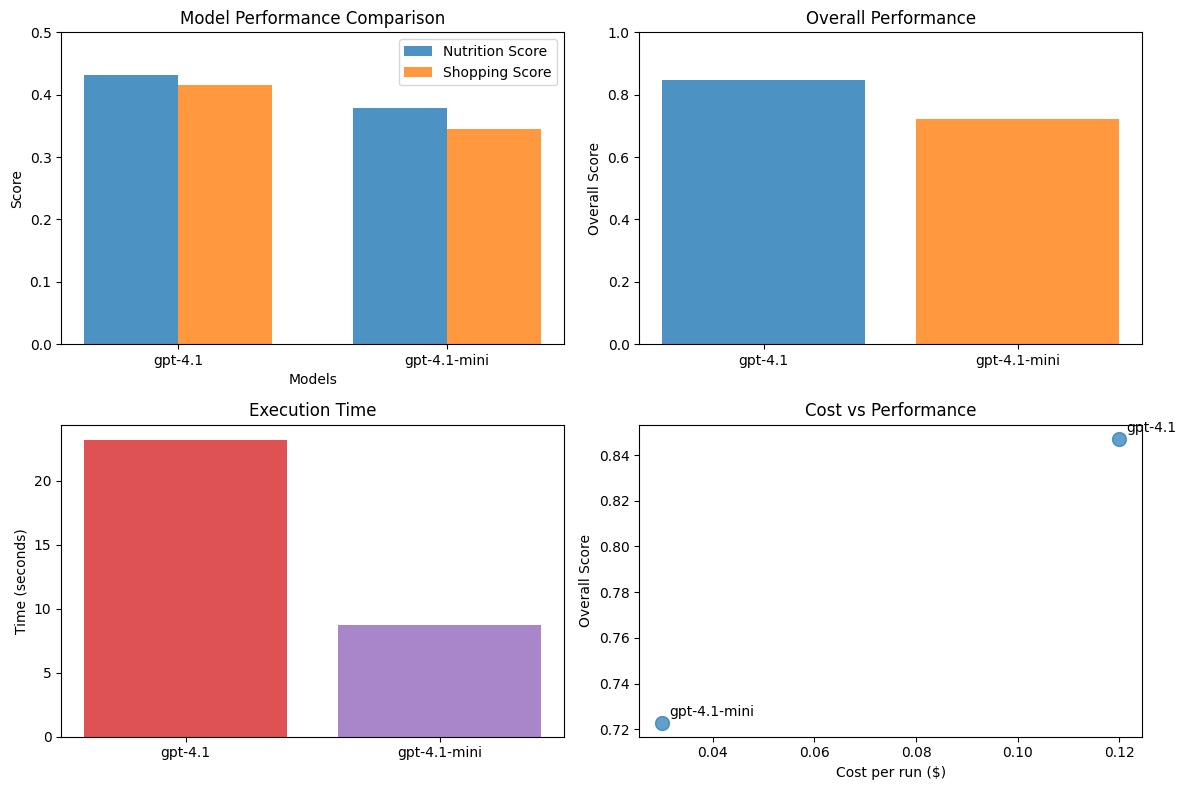

📊 Performance Summary:
  gpt-4.1:
    Overall Score: 0.847
    Execution Time: 23.2s
    Cost Efficiency: 7.1 score/$
  gpt-4.1-mini:
    Overall Score: 0.723
    Execution Time: 8.7s
    Cost Efficiency: 24.1 score/$


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample performance data (would come from actual evaluation runs)
models = [
    "gpt-4.1",
    "gpt-4.1-mini",
]
nutrition_scores = [
    0.432,
    0.378,
]
shopping_scores = [
    0.415,
    0.345,
]
execution_times = [
    23.2,
    8.7,
]

# Create comparison charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Score comparison
x = np.arange(len(models))
width = 0.35

ax1.bar(x - width / 2, nutrition_scores, width, label="Nutrition Score", alpha=0.8)
ax1.bar(x + width / 2, shopping_scores, width, label="Shopping Score", alpha=0.8)
ax1.set_xlabel("Models")
ax1.set_ylabel("Score")
ax1.set_title("Model Performance Comparison")
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 0.5)

# Overall scores
overall_scores = [
    n + s for n, s in zip(nutrition_scores, shopping_scores, strict=False)
]
ax2.bar(models, overall_scores, color=["#1f77b4", "#ff7f0e", "#2ca02c"], alpha=0.8)
ax2.set_ylabel("Overall Score")
ax2.set_title("Overall Performance")
ax2.set_ylim(0, 1.0)

# Execution time
ax3.bar(models, execution_times, color=["#d62728", "#9467bd", "#8c564b"], alpha=0.8)
ax3.set_ylabel("Time (seconds)")
ax3.set_title("Execution Time")

# Cost-performance trade-off (hypothetical data)
costs = [
    0.12,
    0.03,
]  # USD per run
ax4.scatter(costs, overall_scores, s=100, alpha=0.7)
for i, model in enumerate(models):
    ax4.annotate(
        model, (costs[i], overall_scores[i]), xytext=(5, 5), textcoords="offset points"
    )
ax4.set_xlabel("Cost per run ($)")
ax4.set_ylabel("Overall Score")
ax4.set_title("Cost vs Performance")

plt.tight_layout()
plt.show()

# Print summary
print("📊 Performance Summary:")
for i, model in enumerate(models):
    print(f"  {model}:")
    print(f"    Overall Score: {overall_scores[i]:.3f}")
    print(f"    Execution Time: {execution_times[i]}s")
    print(f"    Cost Efficiency: {overall_scores[i] / costs[i]:.1f} score/$")

## Key Learnings and Next Steps

### What Worked Well:
1. **Tool-using agent pattern**: Clean separation of concerns with FatSecret API integration
2. **Structured evaluation**: Automated scoring system enables objective model comparison
3. **Rich CLI interface**: User-friendly interaction with comprehensive output formatting
4. **Flexible architecture**: Easy to extend with new dietary constraints and evaluation metrics

### Challenges Encountered:
1. **API rate limiting**: Required careful request management and caching
2. **Nutrition data consistency**: Different food databases have varying nutritional information
3. **Response parsing**: LLM outputs needed robust validation and error handling
4. **Evaluation complexity**: Balancing multiple objectives (nutrition, cost, variety) is non-trivial

### Future Improvements:
- **Multi-agent system**: Separate agents for planning, validation, and optimization
- **Learning from feedback**: Adapt to user preferences over time
- **Recipe generation**: Create novel recipes instead of just searching existing ones
- **Seasonal awareness**: Factor in ingredient availability and seasonality
- **Batch cooking optimization**: Consider meal prep and leftover management